In [ ]:
import warnings

import torch

from dataset import PIDJSONDataset, get_dataloaders
from multi_main import train_task
from wrapper import Wrapper

warnings.filterwarnings("ignore")

In [2]:
device = (
    torch.device("cuda")
    if torch.cuda.is_available()
    else torch.device("mps")
    if torch.backends.mps.is_available()
    else torch.device("cpu")
)
IMAGES_DIR = "dataset/images"
ANN_DIR = "dataset/annotations"
# ---------------- Configuration ----------------
config = {
    "batch_size": 8,
    "epochs": 10,
    "learning_rate": 0.001,
    "train_split": 0.8,
    "val_split": 0.1,
    "test_split": 0.1,
    "iou_threshold": 0.5,
    "confidence_threshold": 0.35,
}

In [3]:
tasks = ["symbol", "word", "line"]

wrappers = {}
datasets = {}
train_loaders = {}
val_loaders = {}
test_loaders = {}

In [4]:
for task in tasks:
    print(f"\n--- Setting up {task} model ---")

    # Dataset
    dataset = PIDJSONDataset(
        images_dir=IMAGES_DIR, ann_dir=ANN_DIR, symbol_mode="unified", task=task
    )

    # Dataloaders
    train_loader, val_loader, test_loader = get_dataloaders(
        dataset=dataset,
        batch_size=config["batch_size"],
        train_split=config["train_split"],
        val_split=config["val_split"],
        num_workers=4,
    )

    # Store loaders
    datasets[task] = dataset
    train_loaders[task] = train_loader
    val_loaders[task] = val_loader
    test_loaders[task] = test_loader

    # Wrapper (auto-assign architecture)
    wrapper = Wrapper(device=device, task=task)
    wrappers[task] = wrapper


--- Setting up symbol model ---
Found 500 annotation files
Loaded 500 diagrams
Mode: unified
Classes: ['background', 'symbol', 'word', 'line'] (4)
Splits - Train: 400, Val: 50, Test: 50
Creating Faster R-CNN with 2 classes

--- Setting up word model ---
Found 500 annotation files
Loaded 500 diagrams
Mode: unified
Classes: ['background', 'symbol', 'word', 'line'] (4)
Splits - Train: 400, Val: 50, Test: 50
Creating Faster R-CNN with 2 classes

--- Setting up line model ---
Found 500 annotation files
Loaded 500 diagrams
Mode: unified
Classes: ['background', 'symbol', 'word', 'line'] (4)
Splits - Train: 400, Val: 50, Test: 50
Creating Faster R-CNN with 2 classes



=== Training SYMBOL model (None) ===
Training on cuda for 10 epochs

Epoch 1/10


Epoch 1: 100%|██████████| 50/50 [00:44<00:00,  1.11it/s, loss=0.9616]


Model saved to: models/best_model.pth
Saved new best model with val loss 0.8670
Train Loss: 1.3415, Val Loss: 0.8670

Epoch 2/10


Epoch 2: 100%|██████████| 50/50 [00:44<00:00,  1.12it/s, loss=0.6733]


Model saved to: models/best_model.pth
Saved new best model with val loss 0.7207
Train Loss: 0.8052, Val Loss: 0.7207

Epoch 3/10


Epoch 3: 100%|██████████| 50/50 [00:45<00:00,  1.09it/s, loss=0.6524]


Model saved to: models/best_model.pth
Saved new best model with val loss 0.6438
Train Loss: 0.6970, Val Loss: 0.6438

Epoch 4/10


Epoch 4: 100%|██████████| 50/50 [00:46<00:00,  1.09it/s, loss=0.6882]


Model saved to: models/best_model.pth
Saved new best model with val loss 0.6386
Train Loss: 0.6627, Val Loss: 0.6386

Epoch 5/10


Epoch 5: 100%|██████████| 50/50 [00:46<00:00,  1.08it/s, loss=0.7164]


Model saved to: models/best_model.pth
Saved new best model with val loss 0.6305
Train Loss: 0.6523, Val Loss: 0.6305

Epoch 6/10


Epoch 6: 100%|██████████| 50/50 [00:45<00:00,  1.10it/s, loss=0.6360]


Model saved to: models/best_model.pth
Saved new best model with val loss 0.6213
Train Loss: 0.6477, Val Loss: 0.6213

Epoch 7/10


Epoch 7: 100%|██████████| 50/50 [00:45<00:00,  1.09it/s, loss=0.5843]


Train Loss: 0.6478, Val Loss: 0.6259

Epoch 8/10


Epoch 8: 100%|██████████| 50/50 [00:45<00:00,  1.11it/s, loss=0.5288]


Train Loss: 0.6455, Val Loss: 0.6252

Epoch 9/10


Epoch 9: 100%|██████████| 50/50 [00:45<00:00,  1.09it/s, loss=0.5786]


Model saved to: models/best_model.pth
Saved new best model with val loss 0.6181
Train Loss: 0.6455, Val Loss: 0.6181

Epoch 10/10


Epoch 10: 100%|██████████| 50/50 [00:44<00:00,  1.11it/s, loss=0.6159]


Model saved to: models/best_model.pth
Saved new best model with val loss 0.6148
Train Loss: 0.6413, Val Loss: 0.6148

Evaluating SYMBOL model on test set...
Evaluating model...


Evaluating: 100%|██████████| 7/7 [00:08<00:00,  1.23s/it]


symbol - Precision: 0.921, Recall: 0.699, F1: 0.795

--- SYMBOL RESULTS ---
mAP: 0.9209
Mean IoU: 0.7551
Precision: 0.9209
Recall: 0.6991
F1-Score: 0.7948
Inference Time: 0.0292 sec/image


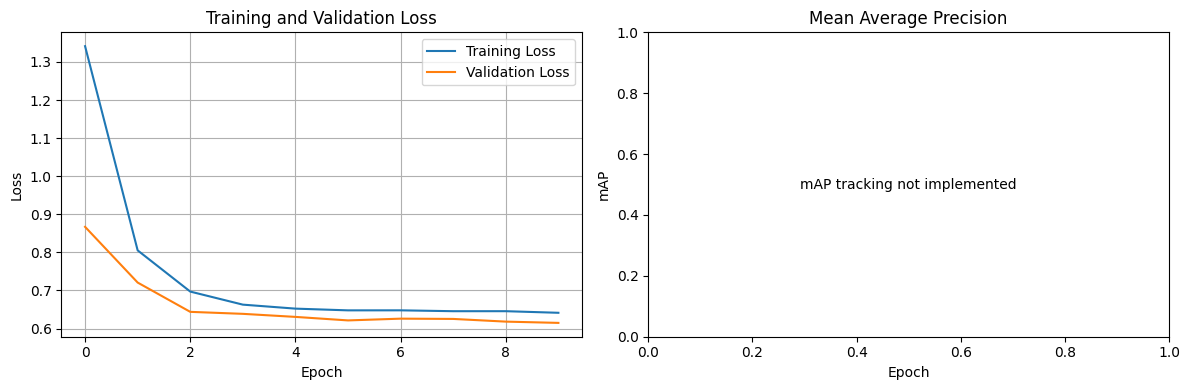

Model saved to: models/symbol_final_model.pth
SYMBOL model saved as 'models/symbol_final_model.pth'
Training curves saved as 'models/training_curves_symbol.png'


In [7]:
trainer_symbol, metrics_symbol = train_task(
    "symbol",
    wrappers,
    config,
    device,
    train_loaders,
    test_loaders,
    val_loaders,
)


=== Training WORD model (None) ===
Training on cuda for 10 epochs

Epoch 1/10


Epoch 1: 100%|██████████| 50/50 [00:33<00:00,  1.49it/s, loss=1.5228]


Model saved to: models/best_model.pth
Saved new best model with val loss 1.5376
Train Loss: 2.0146, Val Loss: 1.5376

Epoch 2/10


Epoch 2: 100%|██████████| 50/50 [00:34<00:00,  1.46it/s, loss=1.2223]


Model saved to: models/best_model.pth
Saved new best model with val loss 1.2881
Train Loss: 1.3650, Val Loss: 1.2881

Epoch 3/10


Epoch 3: 100%|██████████| 50/50 [00:34<00:00,  1.46it/s, loss=1.0838]


Model saved to: models/best_model.pth
Saved new best model with val loss 1.1233
Train Loss: 1.1724, Val Loss: 1.1233

Epoch 4/10


Epoch 4: 100%|██████████| 50/50 [00:51<00:00,  1.04s/it, loss=1.0994]


Model saved to: models/best_model.pth
Saved new best model with val loss 1.1156
Train Loss: 1.1031, Val Loss: 1.1156

Epoch 5/10


Epoch 5: 100%|██████████| 50/50 [00:47<00:00,  1.05it/s, loss=1.0533]


Model saved to: models/best_model.pth
Saved new best model with val loss 1.0916
Train Loss: 1.0931, Val Loss: 1.0916

Epoch 6/10


Epoch 6: 100%|██████████| 50/50 [00:35<00:00,  1.41it/s, loss=1.0809]


Model saved to: models/best_model.pth
Saved new best model with val loss 1.0906
Train Loss: 1.0859, Val Loss: 1.0906

Epoch 7/10


Epoch 7: 100%|██████████| 50/50 [00:34<00:00,  1.45it/s, loss=1.0937]


Model saved to: models/best_model.pth
Saved new best model with val loss 1.0795
Train Loss: 1.0772, Val Loss: 1.0795

Epoch 8/10


Epoch 8: 100%|██████████| 50/50 [00:34<00:00,  1.43it/s, loss=1.0804]


Train Loss: 1.0823, Val Loss: 1.0867

Epoch 9/10


Epoch 9: 100%|██████████| 50/50 [00:35<00:00,  1.40it/s, loss=1.0851]


Train Loss: 1.0812, Val Loss: 1.0878

Epoch 10/10


Epoch 10: 100%|██████████| 50/50 [00:36<00:00,  1.35it/s, loss=1.0190]


Train Loss: 1.0746, Val Loss: 1.1116

Evaluating WORD model on test set...
Evaluating model...


Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.06it/s]


word - Precision: 0.367, Recall: 0.108, F1: 0.167

--- WORD RESULTS ---
mAP: 0.3669
Mean IoU: 0.3624
Precision: 0.3669
Recall: 0.1085
F1-Score: 0.1674
Inference Time: 0.0294 sec/image


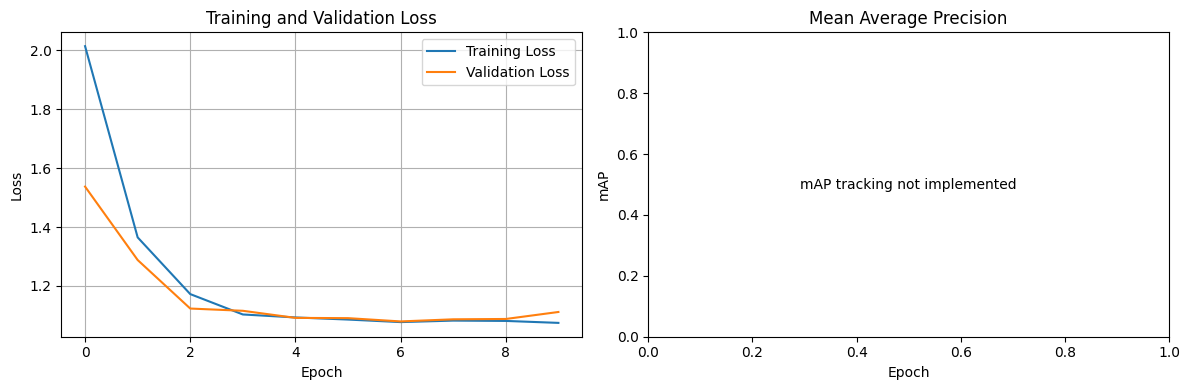

Model saved to: models/word_final_model.pth
WORD model saved as 'models/word_final_model.pth'
Training curves saved as 'models/training_curves_word.png'


In [6]:
trainer_word, metrics_word = train_task(
    "word",
    wrappers,
    config,
    device,
    train_loaders,
    test_loaders,
    val_loaders,
)


=== Training LINE model (None) ===
Training on cuda for 10 epochs

Epoch 1/10


Epoch 1: 100%|██████████| 50/50 [01:32<00:00,  1.86s/it, loss=1.1513]


Model saved to: models/best_model.pth
Saved new best model with val loss 1.1625
Train Loss: 2.0769, Val Loss: 1.1625

Epoch 2/10


Epoch 2: 100%|██████████| 50/50 [01:23<00:00,  1.67s/it, loss=1.0014]


Model saved to: models/best_model.pth
Saved new best model with val loss 1.0133
Train Loss: 1.0857, Val Loss: 1.0133

Epoch 3/10


Epoch 3: 100%|██████████| 50/50 [01:32<00:00,  1.86s/it, loss=1.0480]


Train Loss: 1.0443, Val Loss: 1.0151

Epoch 4/10


Epoch 4: 100%|██████████| 50/50 [01:36<00:00,  1.92s/it, loss=1.0772]


Model saved to: models/best_model.pth
Saved new best model with val loss 1.0061
Train Loss: 1.0286, Val Loss: 1.0061

Epoch 5/10


Epoch 5: 100%|██████████| 50/50 [01:37<00:00,  1.94s/it, loss=1.0030]


Model saved to: models/best_model.pth
Saved new best model with val loss 0.9722
Train Loss: 0.9961, Val Loss: 0.9722

Epoch 6/10


Epoch 6: 100%|██████████| 50/50 [01:37<00:00,  1.95s/it, loss=0.9752]


Model saved to: models/best_model.pth
Saved new best model with val loss 0.9574
Train Loss: 0.9682, Val Loss: 0.9574

Epoch 7/10


Epoch 7: 100%|██████████| 50/50 [01:34<00:00,  1.88s/it, loss=0.9657]


Train Loss: 0.9703, Val Loss: 0.9668

Epoch 8/10


Epoch 8: 100%|██████████| 50/50 [01:32<00:00,  1.84s/it, loss=0.9258]


Train Loss: 0.9710, Val Loss: 0.9682

Epoch 9/10


Epoch 9: 100%|██████████| 50/50 [01:32<00:00,  1.85s/it, loss=0.9968]


Train Loss: 0.9730, Val Loss: 0.9854

Epoch 10/10


Epoch 10: 100%|██████████| 50/50 [01:34<00:00,  1.89s/it, loss=0.9649]


Train Loss: 0.9711, Val Loss: 0.9929

Evaluating LINE model on test set...
Evaluating model...


Evaluating: 100%|██████████| 7/7 [00:19<00:00,  2.72s/it]


line - Precision: 0.038, Recall: 0.014, F1: 0.020

--- LINE RESULTS ---
mAP: 0.0376
Mean IoU: 0.0459
Precision: 0.0376
Recall: 0.0139
F1-Score: 0.0203
Inference Time: 0.0585 sec/image


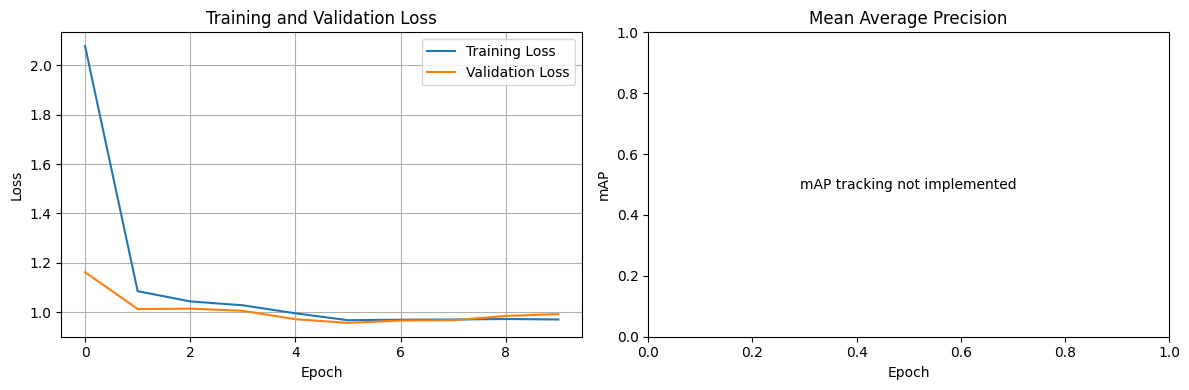

Model saved to: models/line_final_model.pth
LINE model saved as 'models/line_final_model.pth'
Training curves saved as 'models/training_curves_line.png'


In [5]:
trainer_line, metrics_line = train_task(
    "line",
    wrappers,
    config,
    device,
    train_loaders,
    test_loaders,
    val_loaders,
)

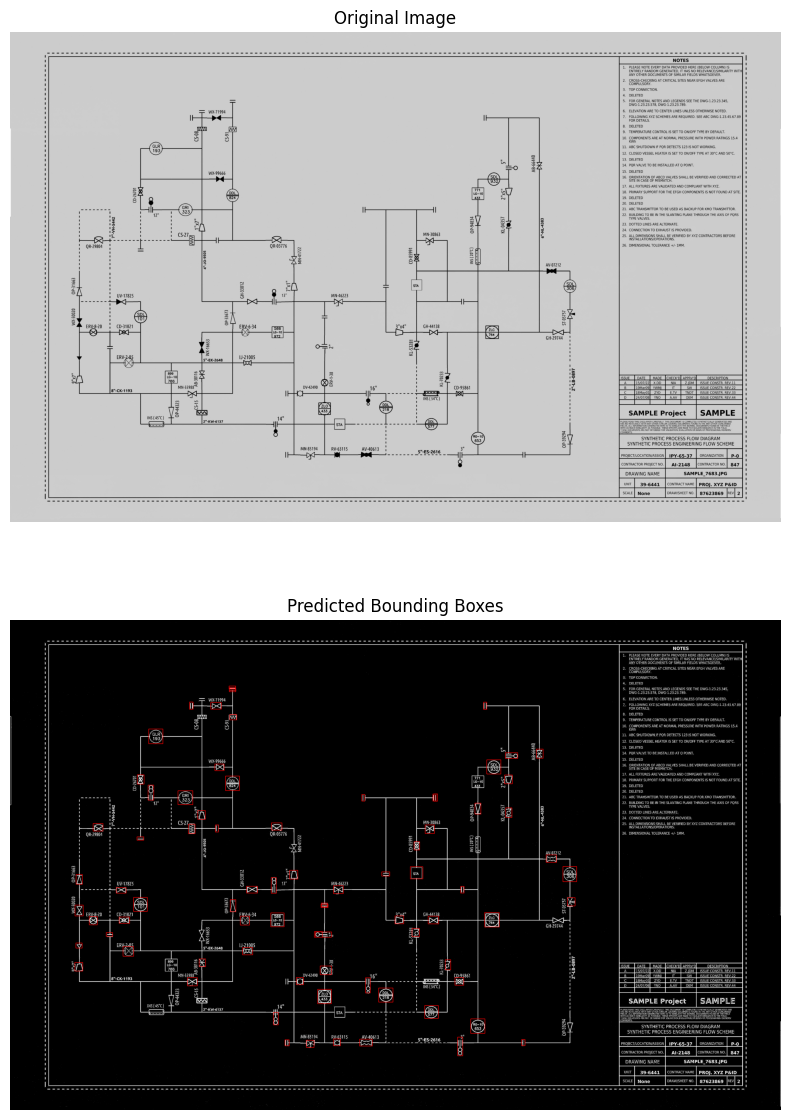

Original image saved at: outputs/0_original.png
Boxed image saved at: outputs/0_symbol.png


In [ ]:
from viz import visualize_and_save_prediction

visualize_and_save_prediction(datasets["symbol"], idx=0, trainer=trainer_symbol, device=device, name="symbol")


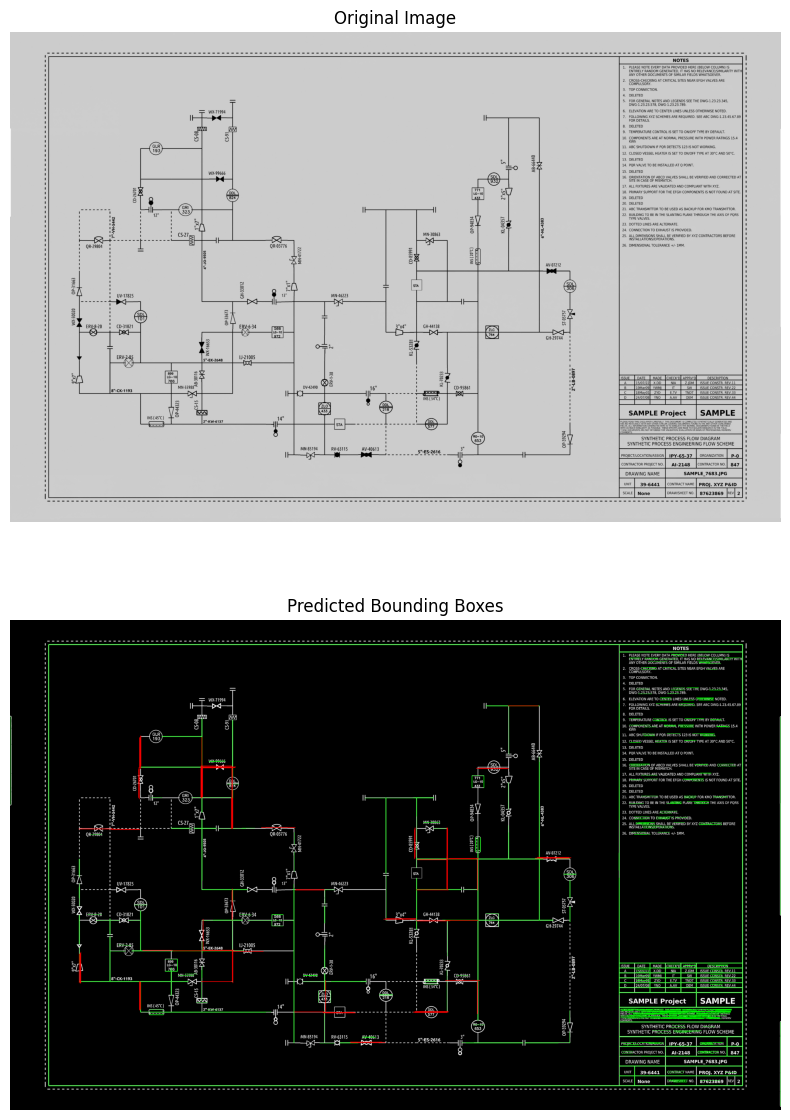

Original image saved at: outputs/0_original.png
Boxed image saved at: outputs/0_line.png


In [ ]:
visualize_and_save_prediction(datasets["line"], idx=0, trainer=trainer_line, device=device, name="line")

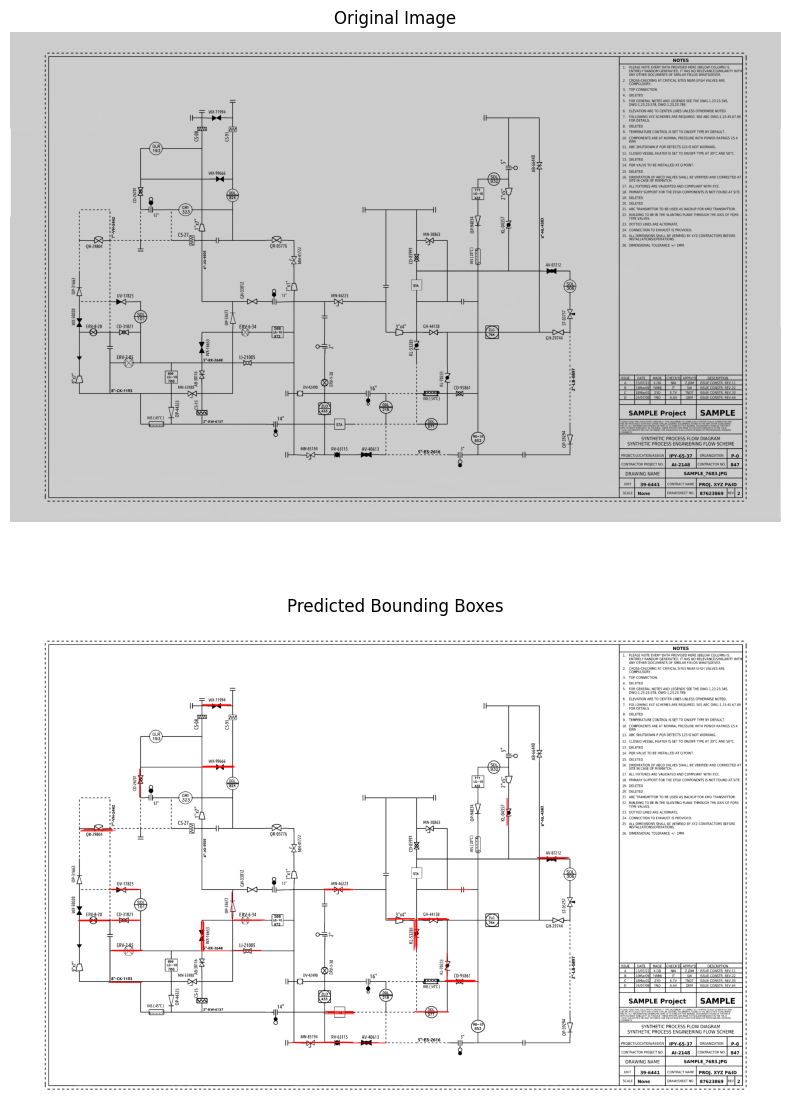

Original image saved at: outputs/0_original.png
Boxed image saved at: outputs/0_word.png


In [ ]:
visualize_and_save_prediction(datasets["word"], idx=0, trainer=trainer_line, device=device, name="word")